Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Ethan Ho"
COLLABORATORS = ""

---

<div class="alert alert-block alert-info">
<h3>Student(s) Information</h3> Please provide information about yourself.<br>
<b>Name1</b>: Ethan Ho<br>
<b>Name2 (optional) </b>:<br>
<b>NetID 1</b>: eh479 <br>
<b>NetID 2 (optional)</b>:<br>
<b>Group Project Declaration</b> (please provide a brief description of your partners contribution to the project. Do not discuss with partner before writing this):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: EH     


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

## Important
<font color='red'>
This project is provided to you as a class project in CS439. **DO NOT** post this notebook in any public or commerical space. Doing so may result in severe penalties. Please discuss with instructor if you have questions. 
</font>

# CS 439 - Introduction to Data Science
### Spring 2023

# Midsemester Project : Twitter Data Analysis

### Due Date : Sunday March 26th, 2023 by 11:59 PM 


### Completing this project
This is your mid-semester project. You can work on this project individually or as part of a group of 2.
    
#### 1. Working with a partner
Only one partner (max two per group) is allowed. Each person in the group is expected to contribute equally to the project. The team needs to do work equivalent to 2 individuals. We will be strict in grading criteria for groups. The team also needs to work hard to find good answers for Part 1 and Part 7. A post questionaire may be given to assess each person contribution. Each person in the team MUST submit a copy of the project. You MUST complete this survey by 3/10 to work as a team <a href="https://forms.gle/2qcog71UqQsgovCB8">CLICK HERE TO FILL THE SURVEY </a>

#### 2. Working by yourself
If you work by yourself, you have two parts optional. Part 1 and Part 7. You are welcome to try those Parts just to learn things. No extra credit.


## Project Purpose    
 
The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, Former President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. In fact, social media post are so influential, now the traditional media spends considerable amount of time discussing social media posts. Tweets from people like Donald Trump and Elon Musk have become so consequential, they can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump or Musk meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from former US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we can pick any person (Hillary Clinton or Donald Trump or Elon Musk) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret insights w/o any bias.

## Grading of the Project
You can test your project with the files provided. We may test the correctness of your code using **different files**. As a result, we will not provide sample outputs for this project. You will need to determine if the output received is reasonable. We are not looking for 100% compatibility with any one data set.

## Set up
Let us get all the libaries initialized as necessary

In [2]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## Downloading Recent Tweets (group only)
It is important to download the most recent tweets (especially if you are working as a group). You cannot download the recent tweets by @realdonaldtrump as he was inactive for last two years. But you can download tweets from @elonmusk or @joebiden to see how things work. Those who are working by themselves are allowed to use the downloaded files in data folder w/o setting up access to any twitter API (which can sometime be bit complicated). Twitter provides the API Tweepy (http://www.tweepy.org/) that makes it easy to access twitter content that is publicly available. We will also provide example code as needed.

In [3]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
#import tweepy

## PART 1:  Accessing Twitter API  (optional for individuals)
In order to access Twitter API, you need to get keys by signing up as a Twitter developer. We will walk you through this process. 
* if you are working by yourself on this project, you can skip PART 1, and complete the project using the data files provided in the data folder instead. We highly recommend that you do Part 1 as an individual (after completing the project with offline data). You will "learn" how to use Twitter API that might be useful for learning how to work with API's.

### Task 1.1

Follow the instructions below to get your Twitter API keys.  **Read the instructions completely before starting.**

1. [Create a Twitter account](https://twitter.com/).  You can use an existing account if you have one; if you prefer to not do this assignment under your regular account, feel free to create a throw-away account.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://developer.twitter.com/en) by clicking the 'Apply' button on the top right of the page. Attach it to your Twitter account. You'll have to fill out a form describing what you want to do with the developer account. Explain that you are doing this for a class at Rutgers University and that you don't know exactly what you're building yet and just need the account to get started. These applications are approved by some sort of AI system, so it doesn't matter exactly what you write. Just don't enter a bunch of alweiofalwiuhflawiuehflawuihflaiwhfe type stuff or you might get rejected.
4. Once you're logged into your developer account, [create an application for this assignment](https://developer.twitter.com/en/docs/projects/overview).  You can call it whatever you want, and you can write any URL when it asks for a web site.  You don't need to provide a callback URL.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.

## WARNING (Please Read) !!!!


### Protect your Twitter Keys
<span style="color:red">
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**. 
</span>
The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.


### Avoid making too many API calls.

<span style="color:red">
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  </span> 
So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.


### Be careful about which functions you call!

<span style="color:red">
This API can retweet tweets, follow and unfollow people, and modify your twitter settings.  Be careful which functions you invoke! </span> It is possible that you can accidentally re-tweet some tweets because you typed `retweet` instead of `retweet_count`. 
</span>


### Reading Keys.json

In [4]:
#import json
#key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled in question 1):
#with open(key_file) as f:
#    keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

### Task 1.2 Testing Twitter Authentication
This following code should run w/o errors or warnings and display Rutgers University's twitter username

In [5]:
"""import tweepy
from tweepy import TweepyException
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    redirect_url = auth.get_authorization_url()
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Rutgers username is:", api.get_user(screen_name="RutgersU").name)
except TweepyException as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)"""

'import tweepy\nfrom tweepy import TweepyException\nimport logging\n\ntry:\n    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])\n    redirect_url = auth.get_authorization_url()\n    auth.set_access_token(keys["access_token"], keys["access_token_secret"])\n    api = tweepy.API(auth)\n    print("Rutgers username is:", api.get_user(screen_name="RutgersU").name)\nexcept TweepyException as e:\n    logging.warning("There was a Tweepy error. Double check your API keys and try again.")\n    logging.warning(e)'

#### Getting more information from RutgersU
Find the following information about RutgersU. Show code and use a print statement to print the output.

In [6]:
# What is RutgersU screen name?

# What is the location RutgersU?

# What is a description for RutgersU?

# How many follow RutgersU?

# When was RutgersU account created?

# Is RutgersU a verified account?


### Task 1.3

### Refactor and Extend Code

Re-factor the above twitter authentication code and extend the code into reusable snippets below.  

In [7]:
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    ### BEGIN ANSWER
   
    # your solution here

    ### END ANSWER

In [8]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    import tweepy
    
   ### BEGIN ANSWER
   
    # your solution here

    ### END ANSWER

In [9]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    ### BEGIN ANSWER
   
    # your solution here

    ### END ANSWER

In [10]:
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    
    ### BEGIN ANSWER
   
    # your solution here

    ### END ANSWER

### Task 1.4
If everything was implemented correctly you should be able to obtain roughly the last max number of tweets by @RutgersU. (This may take a few minutes)

In [11]:
# When you are done, run this cell to load latest @RutgersU 's tweets. This is to get the latest tweets. Do not use the cached file
#rutgers_tweets = download_recent_tweets_by_user("RutgersU", key_file)
#print("Number of tweets downloaded:", len(rutgers_tweets))

## PART 2 - Working with Twitter Data (group/individual)
The json file in data folder contains some loaded tweets from @RutgersU and @realdonaldtrump. Run the folllowing code and read and understand and what it does. Groups must download the latest tweets from @RutgersU using tweepy (and call that). Individuals can use the given file.

In [12]:
from pathlib import Path
import json

ds_tweets_save_path = "data/RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [13]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Nov 02 23:02:49 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [22, 31], 'text': 'internet'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 955836661702774784,
                                 'id_str': '955836661702774784',
                                 'indices': [3, 13],
                                 'name': 'Rutgers University–New Brunswick',
                                 'screen_name': 'RutgersNB'},
                                {'id': 52517689,
                                 'id_str': '52517689',
                                 'indices': [42, 58],
                                 'name': 'Rutgers School of Communication and '
                                         'Information',
                                 'screen_name': 'RutgersCommInfo'},
                                {'id': 392737670,
                   

In [14]:
# print the first 50 tweets from the cached file
for tweet in example_tweets[:50]:
    pprint(tweet)



{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Nov 02 23:02:49 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [22, 31], 'text': 'internet'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 955836661702774784,
                                 'id_str': '955836661702774784',
                                 'indices': [3, 13],
                                 'name': 'Rutgers University–New Brunswick',
                                 'screen_name': 'RutgersNB'},
                                {'id': 52517689,
                                 'id_str': '52517689',
                                 'indices': [42, 58],
                                 'name': 'Rutgers School of Communication and '
                                         'Information',
                                 'screen_name': 'RutgersCommInfo'},
                                {'id': 392737670,
                   

### Task 2.2
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the data folder. One of the files is 'TrumpTweets_1.json', the other one is 'TrumpTweets_2.json'. First load TrumpTweets_1.

In [15]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets will be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [16]:
dest_path = "data/TrumpTweets_1.json"
# Enter path of 'TrumpTweets_1.json' here

trump_tweets = load_tweets(dest_path)

In [17]:
# print the first 10 Trump tweets
from pprint import pprint
for tt in trump_tweets[:10]:
    pprint(tt)


{'created_at': 'Mon Jan 01 13:37:52 +0000 2018',
 'favorite_count': 51473,
 'id': '947824196909961216',
 'in_reply_to_user_id_str': None,
 'is_retweet': False,
 'retweet_count': 8237,
 'source': 'Twitter for iPhone',
 'text': 'Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. '
         'Much work to be done, but it will be a great New Year!'}
{'created_at': 'Mon Jan 01 12:44:40 +0000 2018',
 'favorite_count': 53557,
 'id': '947810806430826496',
 'in_reply_to_user_id_str': '25073877',
 'is_retweet': False,
 'retweet_count': 14595,
 'source': 'Twitter for iPhone',
 'text': 'Iran is failing at every level despite the terrible deal made with '
         'them by the Obama Administration. The great Iranian people have been '
         'repressed for many years. They are hungry for food &amp; for '
         'freedom. Along with human rights, the wealth of Iran is being '
         'looted. TIME FOR CHANGE!'}
{'created_at': 'Mon Jan 01 12:12:00 +0000 2018',
 'favorite_count': 138

### Task 2.3

Find the number of the month of the oldest tweet.

In [18]:
# Find the number of the month of the oldest tweet (e.g. 1 for January)
trump_tweets = pd.DataFrame(trump_tweets)
### BEGIN ANSWER
def oldest_tweet(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    oldest_tweet = df['created_at'].min()
    oldest_month = oldest_tweet.month
    # your solution here
    return oldest_month
### END ANSWER

oldest_month = oldest_tweet(trump_tweets)
print(oldest_month)

1


## PART 3  Twitter Source Analysis (group/individual)



### Task 3.1

Merge the two dataframes created from TrumpTweets_1 and TrumpTweets_2. Call this new dataframe all_tweets

In [19]:
### BEGIN ANSWER
dest_path = "data/TrumpTweets_1.json"
dest_path2 = "data/TrumpTweets_2.json"


TrumpTweets_1 = load_tweets(dest_path)

TrumpTweets_1 = pd.DataFrame(TrumpTweets_1)

TrumpTweets_2 = load_tweets(dest_path2)

TrumpTweets_2 = pd.DataFrame(TrumpTweets_2)

all_tweets = pd.concat([TrumpTweets_1, TrumpTweets_2])



### END ANSWER
all_tweets.head()
      


,source,id,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,id_str,full_text,...,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status
0,Twitter for iPhone,947824196909961216,"Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!",Mon Jan 01 13:37:52 +0000 2018,8237,None,51473,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Twitter for iPhone,947810806430826496,"Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR ...",Mon Jan 01 12:44:40 +0000 2018,14595,25073877,53557,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Twitter for iPhone,947802588174577664,"The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. ...",Mon Jan 01 12:12:00 +0000 2018,49566,None,138808,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Twitter for iPhone,947614110082043904,"HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!",Sun Dec 31 23:43:04 +0000 2017,35164,None,154769,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Twitter for iPhone,947592785519173637,"As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!",Sun Dec 31 22:18:20 +0000 2017,39428,None,157655,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Task 3.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. 
**Important:** There may/will be some overlap so be sure to __eliminate duplicate tweets__. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. **Hint:** the `id` of a tweet is always unique.

The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet.
- `favorite_count`: The favorite count of the tweet.

Finally, **the resulting dataframe should be sorted by date/time.**

**Warning:** *Some tweets may store the text in the `text` field and other will use the `full_text` field.*

In [20]:
# merged dataframe sorted by date/time (earliet tweet first)


### BEGIN ANSWER

df_trump = all_tweets.drop_duplicates(subset='id')

df_trump['text'] = df_trump['text'].fillna('') + df_trump['full_text'].fillna('')

df_trump = df_trump.loc[:, ['id', 'created_at', 'text', 'source', 'retweet_count', 'favorite_count']]
df_trump.loc[:, 'created_at'] = pd.to_datetime(df_trump['created_at'])
df_trump = df_trump.sort_values('created_at')
df_trump = df_trump.rename(columns={'created_at': 'time'})
df_trump = df_trump.set_index('id')
df_trump.index = df_trump.index.astype(int)
duplicates = df_trump.index.duplicated()
df_trump = df_trump[~duplicates]
df_trump.head()
    # your solution here

### END ANSWER

,time,text,source,retweet_count,favorite_count
id,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",Twitter for Android,2108,6735
682764544402440192,2016-01-01 03:25:27+00:00,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,Twitter for iPhone,3460,8581
682792967736848385,2016-01-01 05:18:23+00:00,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,Twitter for iPhone,3434,9143
682805320217980929,2016-01-01 06:07:28+00:00,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,Twitter for iPhone,1948,8258
682805477168779264,2016-01-01 06:08:06+00:00,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",Twitter for Android,2721,7490


In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [21]:
df_trump['source'].unique()


array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter Ads', 'Twitter for iPad',
       'Media Studio', 'TweetDeck', 'Periscope',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'],
      dtype=object)

### Task 3.3

Remove the HTML tags from the source text field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [22]:
import re
### BEGIN ANSWER

html_tag_pattern = re.compile(r'<.*?>')
df_trump['source'] = df_trump['source'].str.replace(html_tag_pattern, '')


df_trump['source'].unique()



### END ANSWER

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter Ads', 'Twitter for iPad',
       'Media Studio', 'TweetDeck', 'Periscope'], dtype=object)

#### Question. What is the most common device used for Trump tweets? Make a plot to find out the most common device types used 
Sort the plot in decreasing order of the most common device type

iPhone is the most common device used for Trump tweets


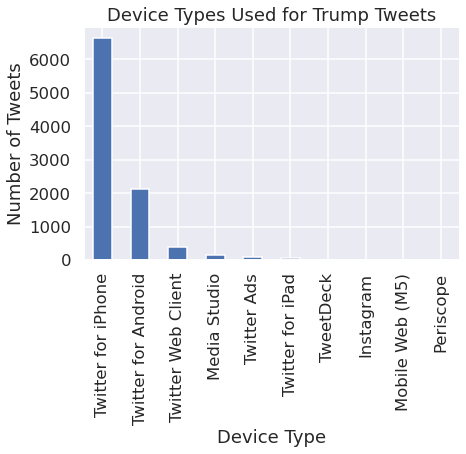

In [23]:
### BEGIN ANSWER
device_count = df_trump['source'].value_counts()

device_count.sort_values(ascending=False).plot(kind='bar')

plt.title('Device Types Used for Trump Tweets')
plt.xlabel('Device Type')
plt.ylabel('Number of Tweets')

print("iPhone is the most common device used for Trump tweets")
plt.show()
### END ANSWER

### Task 3.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

**Note** - If your `time` column is not in datetime format, the following code will not work.

In [24]:
df_trump['time'][0:3]

id
682723973449289728   2016-01-01 00:44:14+00:00
682764544402440192   2016-01-01 03:25:27+00:00
682792967736848385   2016-01-01 05:18:23+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [25]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,text,source,retweet_count,favorite_count,est_time
id,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",Twitter for Android,2108,6735,2015-12-31 19:44:14-05:00
682764544402440192,2016-01-01 03:25:27+00:00,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,Twitter for iPhone,3460,8581,2015-12-31 22:25:27-05:00
682792967736848385,2016-01-01 05:18:23+00:00,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,Twitter for iPhone,3434,9143,2016-01-01 00:18:23-05:00
682805320217980929,2016-01-01 06:07:28+00:00,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,Twitter for iPhone,1948,8258,2016-01-01 01:07:28-05:00
682805477168779264,2016-01-01 06:08:06+00:00,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",Twitter for Android,2721,7490,2016-01-01 01:08:06-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [26]:
df_trump['hour'] = df_trump['time'].dt.hour + df_trump['time'].dt.minute / 60 + df_trump['time'].dt.second / (60**2)
# Write your code here
# a new column that contains the rounded hour
df_trump['roundhour']=round(df_trump['hour'])
df_trump.head()



,time,text,source,retweet_count,favorite_count,est_time,hour,roundhour
id,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",Twitter for Android,2108,6735,2015-12-31 19:44:14-05:00,0.737222,1.0
682764544402440192,2016-01-01 03:25:27+00:00,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,Twitter for iPhone,3460,8581,2015-12-31 22:25:27-05:00,3.424167,3.0
682792967736848385,2016-01-01 05:18:23+00:00,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,Twitter for iPhone,3434,9143,2016-01-01 00:18:23-05:00,5.306389,5.0
682805320217980929,2016-01-01 06:07:28+00:00,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,Twitter for iPhone,1948,8258,2016-01-01 01:07:28-05:00,6.124444,6.0
682805477168779264,2016-01-01 06:08:06+00:00,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",Twitter for Android,2721,7490,2016-01-01 01:08:06-05:00,6.135000,6.0


Use the `roundhour` column and plot the number of tweets at every hour of the day.
Order the plot using the hour of the day (1 to 24). Use seaborn `countplot`

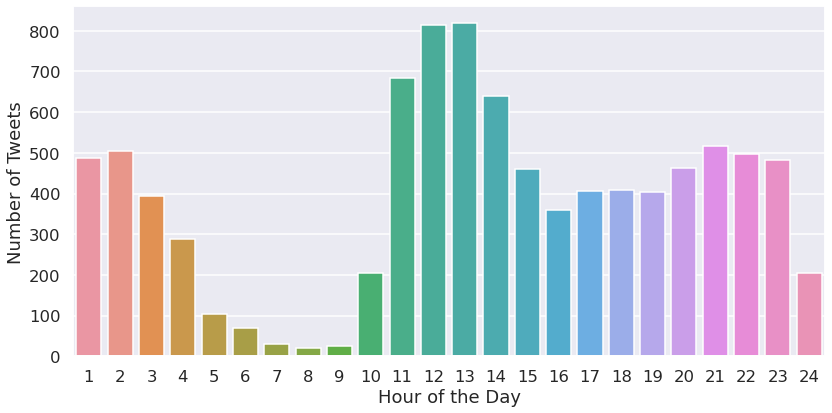

In [27]:
# make a bar plot here
### BEGIN ANSWER

plt.figure(figsize=(12, 6))

sns.countplot(data=df_trump, x='roundhour', order=range(1, 25))

plt.xlabel('Hour of the Day')
plt.xticks(ticks=range(0, 24), labels=[f'{hour}' for hour in range(1, 25)])

plt.ylabel('Number of Tweets')

plt.show()

### END ANSWER

Now, use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following.
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 400px;"/>


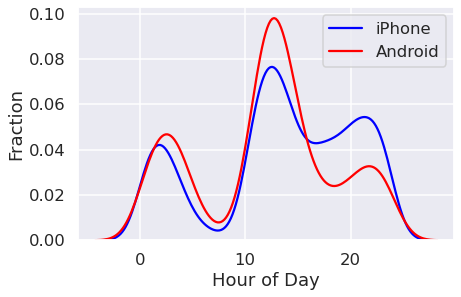

In [28]:
### BEGIN ANSWER



sns.kdeplot(df_trump[df_trump['source'] == 'Twitter for iPhone']['hour'], color='blue', label='iPhone')
sns.kdeplot(df_trump[df_trump['source'] == 'Twitter for Android']['hour'], color='red', label='Android')


plt.xlabel('Hour of Day')
plt.ylabel('Fraction')

plt.legend()

plt.show()




### END ANSWER

### Task 3.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

**Your Response**: 


In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

\\
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 600px;"/>


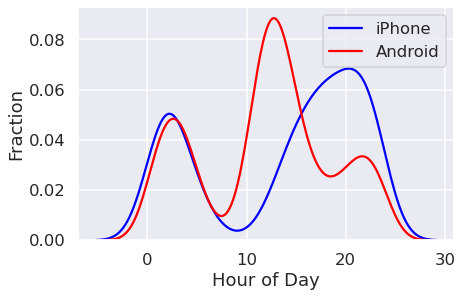

In [29]:
### BEGIN ANSWER



df_trump_2016 = df_trump[df_trump['time'].dt.year == 2016]

sns.kdeplot(df_trump_2016[df_trump_2016['source'] == 'Twitter for iPhone']['hour'], color='blue', label='iPhone')
sns.kdeplot(df_trump_2016[df_trump_2016['source'] == 'Twitter for Android']['hour'], color='red', label='Android')

plt.xlabel('Hour of Day')
plt.ylabel('Fraction')
plt.legend()

plt.show()


### END ANSWER

### Task 3.6
Edit this cell to answer the following questions.
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)

Hour 4 and hour 12 the Android tweets spike.

* What time of the day the iPhone tweets were made by paid staff?

Hour 4 and hour 20 the iPhone tweets spike.

Note that these are speculations based on what you observe in the data set.

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [30]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

![title](images/source_years.png)

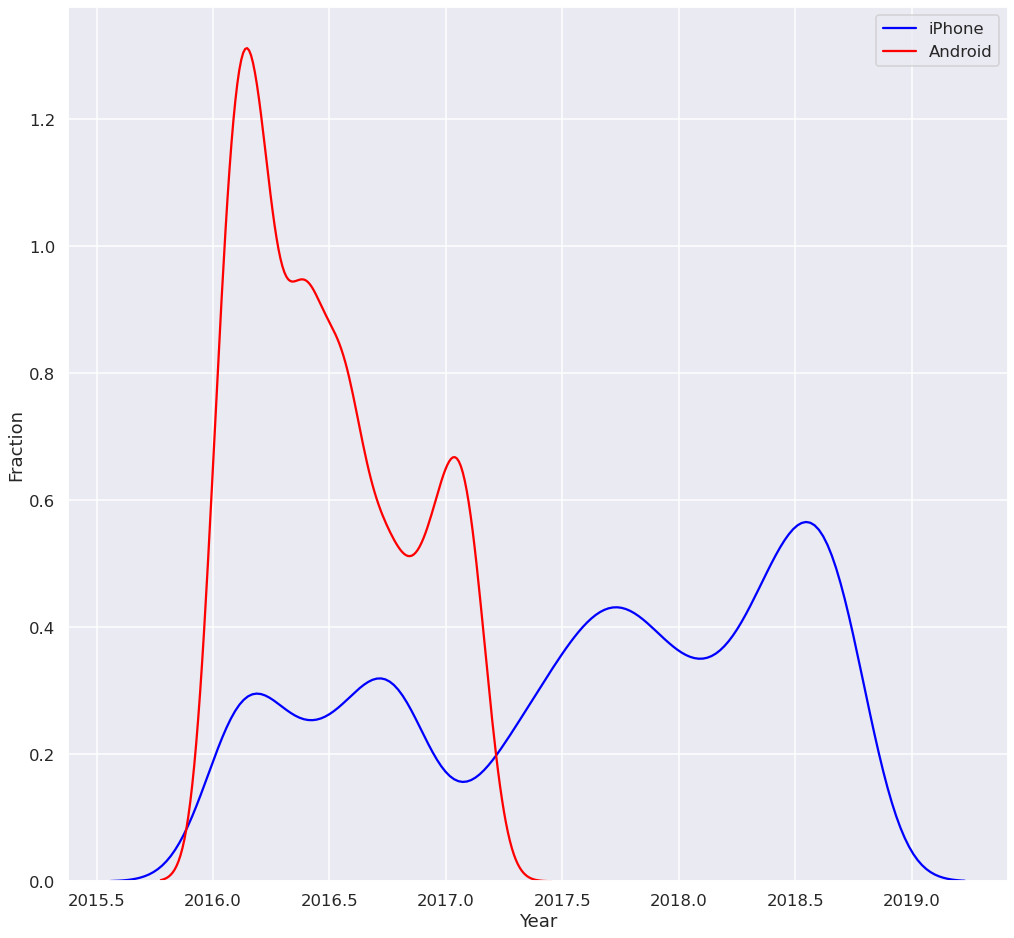

In [31]:
plt.figure(figsize=(15,15))
### BEGIN ANSWER
   

sns.kdeplot(df_trump[df_trump['source']=='Twitter for iPhone']['time'].apply(year_fraction), color='blue', label='iPhone')
sns.kdeplot(df_trump[df_trump['source']=='Twitter for Android']['time'].apply(year_fraction), color='red', label='Android')

plt.xlabel('Year')
plt.ylabel('Fraction')

plt.legend()

plt.show()


    # your solution here

### END ANSWER

## PART 4 - Sentiment Analysis  (group/individual)

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [32]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

**Question** How did they decide the polarities of these words? What are the other two columns in the lexicon? (See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [33]:
### BEGIN ANSWER
#FORMAT: the file is tab delimited with TOKEN, MEAN-SENTIMENT-RATING, STANDARD DEVIATION, and RAW-HUMAN-SENTIMENT-RATINGS
data = pd.read_csv('data/vader_lexicon.txt', sep='\t', header=None)

#data = pd.read_csv("data/vader_lexicon.txt",delimiter='\t',header=None)
df_sent = pd.DataFrame()
df_sent['token']=data[0]
df_sent['sentiment']=data[1]
df_sent=df_sent.set_index('token')

#df_sent = df_sent.set_index('token')
df_sent
### END ANSWER

,sentiment
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
...,...
}:,-2.1
}:(,-2.0
}:),0.4


### Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

Be sure to lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [34]:
### BEGIN ANSWER
df_trump['text'] = df_trump['text'].str.lower()

df_trump
### END ANSWER

,time,text,source,retweet_count,favorite_count,est_time,hour,roundhour,year
id,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",Twitter for Android,2108,6735,2015-12-31 19:44:14-05:00,0.737222,1.0,2016.000000
682764544402440192,2016-01-01 03:25:27+00:00,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,Twitter for iPhone,3460,8581,2015-12-31 22:25:27-05:00,3.424167,3.0,2016.000000
682792967736848385,2016-01-01 05:18:23+00:00,#happynewyearamerica! https://t.co/eeqb8pdrue,Twitter for iPhone,3434,9143,2016-01-01 00:18:23-05:00,5.306389,5.0,2016.000000
682805320217980929,2016-01-01 06:07:28+00:00,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,Twitter for iPhone,1948,8258,2016-01-01 01:07:28-05:00,6.124444,6.0,2016.000000
682805477168779264,2016-01-01 06:08:06+00:00,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",Twitter for Android,2721,7490,2016-01-01 01:08:06-05:00,6.135000,6.0,2016.000000
...,...,...,...,...,...,...,...,...,...
1052213711295930368,2018-10-16 15:04:32+00:00,"“federal judge throws out stormy danials lawsuit versus trump. trump is entitled to full legal fees.” @foxnews great, now i can go after horseface and her 3rd rate lawyer in the great state of texas. she will confirm the letter she signed! she knows nothing about me, a total ...",Twitter for iPhone,14594,54635,2018-10-16 10:04:32-05:00,15.075556,15.0,2018.789041
1052217314463100928,2018-10-16 15:18:51+00:00,“conflict between glen simpson’s testimony to another house panel about his contact with justice department official bruce ohr. ohr was used by simpson and steele as a back channel to get (fake) dossier to fbi. simpson pleading fifth.” catherine herridge. where is jeff sessions?,Twitter for iPhone,6271,20251,2018-10-16 10:18:51-05:00,15.314167,15.0,2018.789041
1052219253384994816,2018-10-16 15:26:33+00:00,"is it really possible that bruce ohr, whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier, and who was used as a pawn in this whole scam (witch hunt), is still working for the department of justice????? can this really be so?????",Twitter for iPhone,13103,41253,2018-10-16 10:26:33-05:00,15.442500,15.0,2018.789041


### Task 4.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

**Question** Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.


In [35]:
# Save your regex in punct_re
### BEGIN ANSWER
   
punct_re = r'[^\w\s]'

regex = re.compile(punct_re, flags=re.IGNORECASE) 
df_trump['no_punc'] = df_trump['text'].str.replace(regex, ' ', regex = True)
df_trump




### END ANSWER

,time,text,source,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc
id,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",Twitter for Android,2108,6735,2015-12-31 19:44:14-05:00,0.737222,1.0,2016.000000,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again
682764544402440192,2016-01-01 03:25:27+00:00,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,Twitter for iPhone,3460,8581,2015-12-31 22:25:27-05:00,3.424167,3.0,2016.000000,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv
682792967736848385,2016-01-01 05:18:23+00:00,#happynewyearamerica! https://t.co/eeqb8pdrue,Twitter for iPhone,3434,9143,2016-01-01 00:18:23-05:00,5.306389,5.0,2016.000000,happynewyearamerica https t co eeqb8pdrue
682805320217980929,2016-01-01 06:07:28+00:00,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,Twitter for iPhone,1948,8258,2016-01-01 01:07:28-05:00,6.124444,6.0,2016.000000,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7
682805477168779264,2016-01-01 06:08:06+00:00,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",Twitter for Android,2721,7490,2016-01-01 01:08:06-05:00,6.135000,6.0,2016.000000,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus
...,...,...,...,...,...,...,...,...,...,...
1052213711295930368,2018-10-16 15:04:32+00:00,"“federal judge throws out stormy danials lawsuit versus trump. trump is entitled to full legal fees.” @foxnews great, now i can go after horseface and her 3rd rate lawyer in the great state of texas. she will confirm the letter she signed! she knows nothing about me, a total ...",Twitter for iPhone,14594,54635,2018-10-16 10:04:32-05:00,15.075556,15.0,2018.789041,federal judge throws out stormy danials lawsuit versus trump trump is entitled to full legal fees foxnews great now i can go after horseface and her 3rd rate lawyer in the great state of texas she will confirm the letter she signed she knows nothing about me a total ...
1052217314463100928,2018-10-16 15:18:51+00:00,“conflict between glen simpson’s testimony to another house panel about his contact with justice department official bruce ohr. ohr was used by simpson and steele as a back channel to get (fake) dossier to fbi. simpson pleading fifth.” catherine herridge. where is jeff sessions?,Twitter for iPhone,6271,20251,2018-10-16 10:18:51-05:00,15.314167,15.0,2018.789041,conflict between glen simpson s testimony to another house panel about his contact with justice department official bruce ohr ohr was used by simpson and steele as a back channel to get fake dossier to fbi simpson pleading fifth catherine herridge where is jeff sessions
1052219253384994816,2018-10-16 15:26:33+00:00,"is it really possible that bruce ohr, whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier, and who was used as a pawn in this whole scam (witch hunt), is still working for the department of justice????? can this really be so?????",Twitter for iPhone,13103,41253,2018-10-16 10:26:33-05:00,15.442500,15.0,2018.789041,is it really possible that bruce ohr whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier and who was used as a pawn in this whole scam witch hunt is still working for the department of justice can this really be so


In [36]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Task 4.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

You can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [37]:
#tidy_format = ...

### BEGIN ANSWER
   
splitted = df_trump['no_punc'].str.split(expand = True).stack()
tidy_format = splitted.reset_index(level=1)
tidy_format.columns = ['num', 'word']
tidy_format
### END ANSWER

,num,word
id,,
682723973449289728,0,i
682723973449289728,1,will
682723973449289728,2,be
682723973449289728,3,on
682723973449289728,4,foxnews
...,...,...
1052233253040640001,6,maga
1052233253040640001,7,https
1052233253040640001,8,t


In [38]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

## Task 4.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `df_trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `df_sent` tables and group the final answer.


In [39]:
#df_trump['polarity'] = ...

### BEGIN ANSWER
merged = pd.merge(tidy_format, df_sent, left_on='word', right_index=True)
merged = merged.groupby('id')['sentiment'].sum()
merged
df_trump=pd.merge(df_trump, merged, left_on=('id'),right_index=True)
df_trump=df_trump.rename(columns={'sentiment':'polarity'})

df_trump

,time,text,source,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc,polarity
id,,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",Twitter for Android,2108,6735,2015-12-31 19:44:14-05:00,0.737222,1.0,2016.000000,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,3.1
682764544402440192,2016-01-01 03:25:27+00:00,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,Twitter for iPhone,3460,8581,2015-12-31 22:25:27-05:00,3.424167,3.0,2016.000000,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv,4.2
682805320217980929,2016-01-01 06:07:28+00:00,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,Twitter for iPhone,1948,8258,2016-01-01 01:07:28-05:00,6.124444,6.0,2016.000000,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9.0
682805477168779264,2016-01-01 06:08:06+00:00,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",Twitter for Android,2721,7490,2016-01-01 01:08:06-05:00,6.135000,6.0,2016.000000,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus,-5.9
683037464504745985,2016-01-01 21:29:56+00:00,"""@sprinklermanus: @cnn @realdonaldtrump they're spending millions but you're still going to win - go donald trump""",Twitter for Android,933,3330,2016-01-01 16:29:56-05:00,21.498889,21.0,2016.000000,sprinklermanus cnn realdonaldtrump they re spending millions but you re still going to win go donald trump,2.8
...,...,...,...,...,...,...,...,...,...,...,...
1052186219696803841,2018-10-16 13:15:18+00:00,"for the record, i have no financial interests in saudi arabia (or russia, for that matter). any suggestion that i have is just more fake news (of which there is plenty)!",Twitter for iPhone,13402,47556,2018-10-16 08:15:18-05:00,13.255000,13.0,2018.789041,for the record i have no financial interests in saudi arabia or russia for that matter any suggestion that i have is just more fake news of which there is plenty,-2.2
1052200515608690688,2018-10-16 14:12:06+00:00,"incredible number just out, 7,036,000 job openings. astonishing - it’s all working! stock market up big on tremendous potential of usa. also, strong profits. we are number one in world, by far!",Twitter for iPhone,13944,51698,2018-10-16 09:12:06-05:00,14.201667,14.0,2018.789041,incredible number just out 7 036 000 job openings astonishing it s all working stock market up big on tremendous potential of usa also strong profits we are number one in world by far,4.8
1052213711295930368,2018-10-16 15:04:32+00:00,"“federal judge throws out stormy danials lawsuit versus trump. trump is entitled to full legal fees.” @foxnews great, now i can go after horseface and her 3rd rate lawyer in the great state of texas. she will confirm the letter she signed! she knows nothing about me, a total ...",Twitter for iPhone,14594,54635,2018-10-16 10:04:32-05:00,15.075556,15.0,2018.789041,federal judge throws out stormy danials lawsuit versus trump trump is entitled to full legal fees foxnews great now i can go after horseface and her 3rd rate lawyer in the great state of texas she will confirm the letter she signed she knows nothing about me a total ...,6.9


In [40]:
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
#assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)


### Task 4.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the 20 most positive and most 20 negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [41]:
print('Most negative tweets:')

### BEGIN ANSWER
   
df_sorted = df_trump.sort_values(by='polarity', ascending=True)
df_sorted.head(20)

### END ANSWER

Most negative tweets:


,time,text,source,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc,polarity
id,,,,,,,,,,,
1031590431379865600,2018-08-20 17:14:59+00:00,"it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!",Twitter for iPhone,28007,103194,2018-08-20 12:14:59-05:00,17.249722,17.0,2018.632877,it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u s postal system from china we can and must end this now the senate should pass the stop act and firmly stop this poison from killing our children and destroying our country no more delay,-20.3
1029731513573822464,2018-08-15 14:08:18+00:00,"the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!",Twitter for iPhone,18887,77843,2018-08-15 09:08:18-05:00,14.138333,14.0,2018.619178,the rigged russian witch hunt goes on and on as the originators and founders of this scam continue to be fired and demoted for their corrupt and illegal activity all credibility is gone from this terrible hoax and much more will be lost as it proceeds no collusion,-16.6
984763579210633216,2018-04-13 12:01:47+00:00,"james comey is a proven leaker &amp; liar. virtually everyone in washington thought he should be fired for the terrible job he did-until he was, in fact, fired. he leaked classified information, for which he should be prosecuted. he lied to congress under oath. he is a weak a...",Twitter for iPhone,31488,122649,2018-04-13 07:01:47-05:00,12.029722,12.0,2018.279452,james comey is a proven leaker amp liar virtually everyone in washington thought he should be fired for the terrible job he did until he was in fact fired he leaked classified information for which he should be prosecuted he lied to congress under oath he is a weak a...,-16.0
1027585937163931648,2018-08-09 16:02:33+00:00,"this is an illegally brought rigged witch hunt run by people who are totally corrupt and/or conflicted. it was started and paid for by crooked hillary and the democrats. phony dossier, fisa disgrace and so many lying and dishonest people already fired. 17 angry dems? stay tuned!",Twitter for iPhone,25954,100675,2018-08-09 11:02:33-05:00,16.042500,16.0,2018.602740,this is an illegally brought rigged witch hunt run by people who are totally corrupt and or conflicted it was started and paid for by crooked hillary and the democrats phony dossier fisa disgrace and so many lying and dishonest people already fired 17 angry dems stay tuned,-15.2
1031508193107763200,2018-08-20 11:48:12+00:00,"where’s the collusion? they made up a phony crime called collusion, and when there was no collusion they say there was obstruction (of a phony crime that never existed). if you fight back or say anything bad about the rigged witch hunt, they scream obstruction!",Twitter for iPhone,23739,93756,2018-08-20 06:48:12-05:00,11.803333,12.0,2018.632877,where s the collusion they made up a phony crime called collusion and when there was no collusion they say there was obstruction of a phony crime that never existed if you fight back or say anything bad about the rigged witch hunt they scream obstruction,-15.0
1022808452677160960,2018-07-27 11:38:32+00:00,"....,the only collusion with russia was with the democrats, so now they are looking at my tweets (along with 53 million other people) - the rigged witch hunt continues! how stupid and unfair to our country....and so the fake news doesn’t waste my time with dumb questions, no,...",Twitter for iPhone,22298,96906,2018-07-27 06:38:32-05:00,11.642222,12.0,2018.567123,the only collusion with russia was with the democrats so now they are looking at m

In [42]:
print('Most positive tweets:')

### BEGIN ANSWER
df_sorted = df_trump.sort_values(by='polarity', ascending=False)
df_sorted.head(20)

### END ANSWER

Most positive tweets:


,time,text,source,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc,polarity
id,,,,,,,,,,,
983143317889323008,2018-04-09 00:43:27+00:00,"congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!",Twitter for iPhone,12169,89538,2018-04-08 19:43:27-05:00,0.724167,1.0,2018.268493,congratulations to patrick reed on his great and courageous masters win when patrick had his amazing win at doral 5 years ago people saw his great talent and a bright future ahead now he is the masters champion,26.5
1007974129474121728,2018-06-16 13:12:14+00:00,"my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!",Twitter for iPhone,42103,180126,2018-06-16 08:12:14-05:00,13.203889,13.0,2018.454795,my supporters are the smartest strongest most hard working and most loyal that we have seen in our countries history it is a beautiful thing to watch as we win elections and gather support from all over the country as we get stronger so does our country best numbers ever,20.7
973716838889660416,2018-03-14 00:25:59+00:00,"it was my great honor to deliver a message at the marine corps air station miramar to our great u.s. military, straight from the heart of the american people: we support you, we thank you, we love you - and we will always have your back! https://t.co/oct1nh3don",Twitter for iPhone,14786,70250,2018-03-13 19:25:59-05:00,0.433056,0.0,2018.197260,it was my great honor to deliver a message at the marine corps air station miramar to our great u s military straight from the heart of the american people we support you we thank you we love you and we will always have your back https t co oct1nh3don,18.9
1016638035281219584,2018-07-10 10:59:30+00:00,"thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new poll says trump, at over 90%, is the most popular republican in history of the party. wow!",Twitter for iPhone,25284,122789,2018-07-10 05:59:30-05:00,10.991667,11.0,2018.520548,thank you to all of my great supporters really big progress being made other countries wanting to fix crazy trade deals economy is roaring supreme court pick getting great reviews new poll says trump at over 90 is the most popular republican in history of the party wow,18.9
1014287566386888709,2018-07-03 23:19:35+00:00,"thank you, @wvgovernor jim justice, for that warm introduction. tonight, it was my great honor to attend the “greenbrier classic – salute to service dinner” in west virginia! god bless our veterans. god bless america - and happy independence day to all! https://t.co/v35qvcn8m6",Twitter for iPhone,9951,48540,2018-07-03 18:19:35-05:00,23.326389,23.0,2018.501370,thank you wvgovernor jim justice for that warm introduction tonight it was my great honor to attend the greenbrier classic salute to service dinner in west virginia god bless our veterans god bless america and happy independence day to all https t co v35qvcn8m6,18.6
994176238846664706,2018-05-09 11:24:20+00:00,"the republican party had a great night. tremendous voter energy and excitement, and all candidates are those who have a great chance of winning in november. the economy is sooo strong, and with nancy pelosi wanting to end the big tax cuts and raise taxes, why wouldn’t we win?",Twitter for iPhone,18374,80777,2018-05-09 06:24:20-05:00,11.405556,11.0,2018.350685,the republican party had a great night tremendous voter energy and excitement and all candidates are those who have a great chance of winning in november the economy is sooo strong and with nancy pelosi wanting to end the b

### Task 4.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

![title](images/nyt_vs_fox.png)

/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


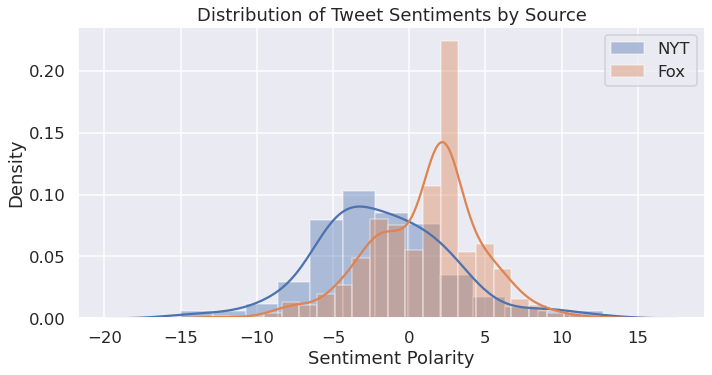

In [43]:
### BEGIN ANSWER
   
df_nyt = df_trump[df_trump['text'].str.contains('nyt')]
df_fox = df_trump[df_trump['text'].str.contains('fox')]

plt.figure(figsize=(10, 5))
sns.distplot(df_nyt['polarity'], label='NYT')
sns.distplot(df_fox['polarity'], label='Fox')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.title('Distribution of Tweet Sentiments by Source')
plt.legend()
plt.show()
### END ANSWER

##### Comment on what you observe:

#### BEGIN ANSWER
The average sentiment for the tweets with "Fox" seem to be more positive than tweets with "NYT". The overall average sentiment for tweets containing "Fox" seems to be near 3, where the average sentiment for tweets containing "NYT" seems to be near -4.

#### END ANSWER

## PART 5 - Principal Component Analysis (PCA) and Twitter  (group and individual)
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like **Make America Great Again**. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). See demo notes books and lecture slides for some sparse matrix methods.
Print the first 10 rows of the df to show the matrix you created

Start with the `tidy_format` dataframe

In [44]:
### BEGIN ANSWER
## code to plot the first 10 rows of the matrix
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
stop_words = stopwords.words('english')

# create a dataframe called tmp to store all words appear in the tweets
tmp=tidy_format

# remove stopwords
df_no_stop = tmp['word'][~tmp['word'].isin(stop_words)]

# deal with plurals
df_no_plural = df_no_stop.apply(lambda s: lemmatizer.lemmatize(s))

# Remove numbers
df_clean = df_no_plural[~(df_no_plural.str.isnumeric())]
df_clean = df_clean.to_frame('word')

# Remove words with only 1 or 2 length
df_clean = df_clean[df_clean['word'].str.len() != 2]
df_clean=df_clean[df_clean['word'].str.len() != 1]

### END ANSWER

words = df_clean.value_counts(ascending=False)
top50_words = words.reset_index()['word'][:50].to_list()
#top50_words

w_to_idx = {}
for i in range(len(top50_words)):
    w_to_idx[top50_words[i]] = i
    
#print(w_to_idx)
    
X = np.zeros((5000, 50))

for i in range(5000):
    if df_clean.iloc[i]['word'] in top50_words:
        X[i, w_to_idx[df_clean.iloc[i]['word']]] += 1
        
first_10_rows = X[:10, :]
print(first_10_rows)

[nltk_data] Downloading package stopwords to /home/eh479/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/eh479/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [45]:
### BEGIN ANSWER
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

component50 = pca.components_
### END ANSWER

[[ 9.98309394e-01 -2.16141507e-02 -1.10738257e-02 ... -3.96490841e-04
  -1.00649016e-03 -1.21401940e-03]
 [ 2.30672030e-02 -7.02162640e-02 -1.47278329e-02 ... -3.29929129e-04
  -8.55825826e-04 -1.04002158e-03]
 [ 1.07476343e-02 -3.43039146e-01 -1.08324286e-02 ... -1.98838873e-04
  -5.19206880e-04 -6.32424501e-04]
 ...
 [-0.00000000e+00 -8.84999813e-28 -3.28685281e-24 ...  1.35661038e-19
   1.47884553e-17  5.30400486e-17]
 [ 0.00000000e+00 -1.74837461e-28 -7.63582186e-25 ... -2.45024185e-19
  -1.00980565e-16  2.00083960e-16]
 [-0.00000000e+00 -3.15181902e-27 -1.02896906e-23 ...  3.17836714e-18
   1.59359442e-16  6.07007598e-17]]
[3.99737366e-02 1.69661597e-02 1.44928297e-02 1.40328334e-02
 1.34486049e-02 1.28259132e-02 9.50241887e-03 8.70108753e-03
 6.94767840e-03 6.35158204e-03 5.17840883e-03 5.00100020e-03
 4.94793069e-03 4.76618737e-03 4.37800293e-03 4.17817241e-03
 3.97844274e-03 3.58639542e-03 3.40068014e-03 3.40068014e-03
 3.35372081e-03 2.98940921e-03 2.80056011e-03 2.80056011e-0

### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. Your answer will look closer to this.

![title](images/pca.png)



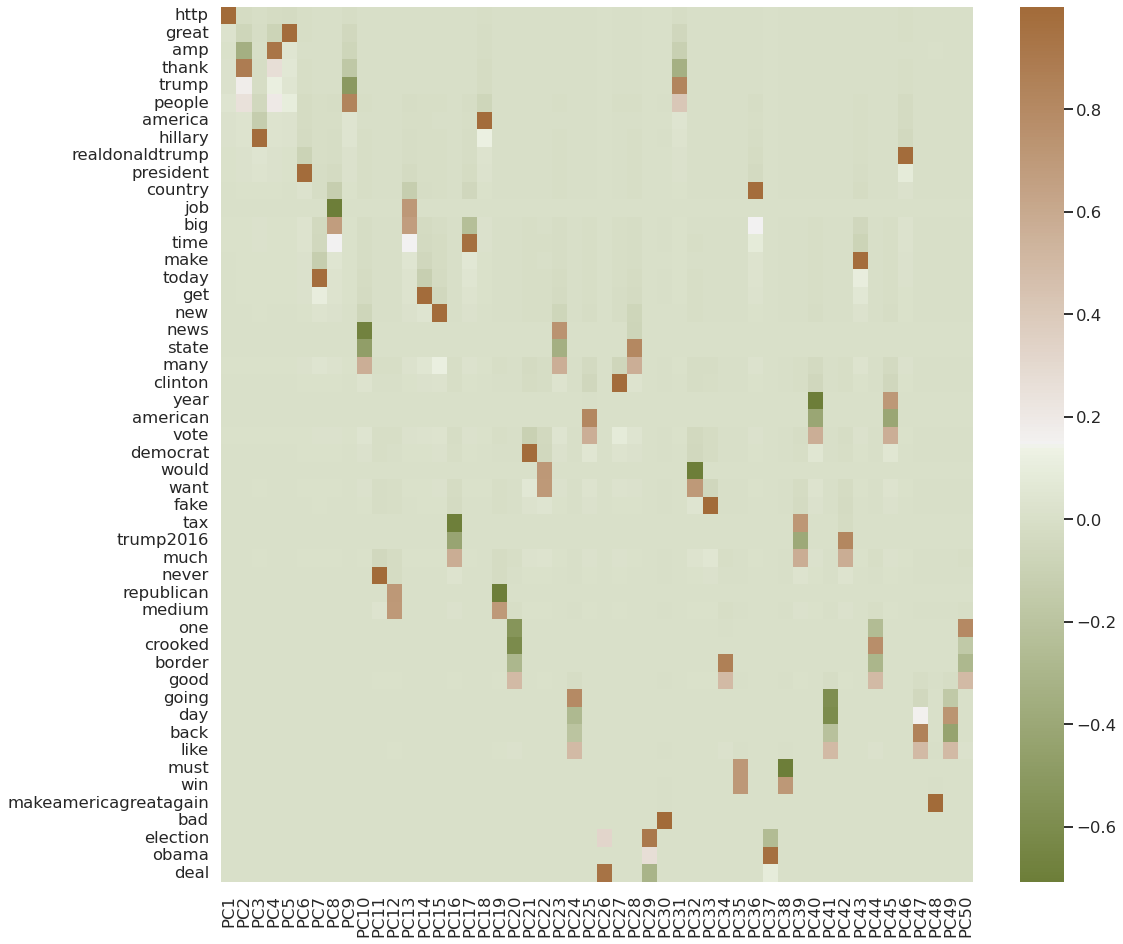

In [46]:
### BEGIN ANSWER
pcalabel = []
for i in range(1,51):
    pcalabel.append('PC'+str(i))
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(100, 400,as_cmap=True)
sns.heatmap(component50, cmap=cmap, yticklabels = top50_words, xticklabels = pcalabel)
plt.show()
### END ANSWER

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


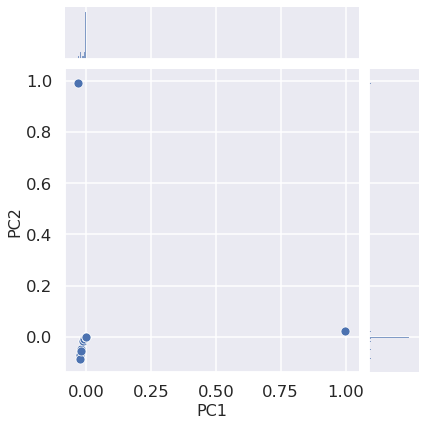

In [47]:
### BEGIN ANSWER
   
pca1 = (component50[0])
pca2 = (component50[1])
fig = sns.jointplot(pca1, pca2)
fig.set_axis_labels('PC1', 'PC2', fontsize=16)
### END ANSWER

## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

### Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~5-7 pandas commands and get everything done on one line.

In [ ]:
#top_20 = ...
### BEGIN ANSWER

temp = tidy_format.copy()
numWord = temp['word'].value_counts()
numWordClean = numWord[numWord>=25].keys()
temp=temp[temp['word'].isin(numWordClean)]

mostR=temp.merge(df_trump['retweet_count'], on='id', how='left').groupby('word').mean()

top_20= mostR.sort_values(ascending=False, by = 'retweet_count').iloc[ 0:20 ,1:2 ]
mostR

### END ANSWER


### Task 6.2
Plot a bar chart of your results:

<AxesSubplot:ylabel='word'>

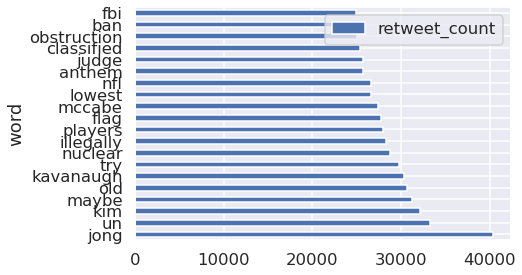

In [49]:
### BEGIN ANSWER
   
top_20.plot.barh()
### END ANSWER

## PART 7 - Kim Jong Un and Musk Tweet Analysis (Optional for Individual)
This is for the groups to do. What else can we study? Let us ask some open ended questions.

### Task 7.1
"kim", "jong" and "un" are apparently really popular in Trump's tweets! It seems like we can conclude that his tweets involving jong are more popular than his other tweets. Or can we?

Consider each of the statements about possible confounding factors below. State whether each statement is true or false and explain. If the statement is true, state whether the confounding factor could have made kim jong un related tweets higher in the list than they should be.

1. We didn't restrict our word list to nouns, so we have unhelpful words like "let" and "any" in our result.
      - That might be why 'un' is the most popular.
1. We didn't remove hashtags in our text, so we have duplicate words (eg. #great and great).
      - Some may only have '#great' not 'great' which make the average lower
1. We didn't account for the fact that Trump's follower count has increased over time.
      - This can affect a lot. As Trump's follower count has increased, the more popular every word be

In [50]:
#plt.figure(figsize=(20,20))

### BEGIN ANSWER
   
# your solution here

### END ANSWER

### Task 7.2
Using the `df_trump` tweets construct an interesting plot describing a property of the data and discuss what you found below.

**Ideas:**

1. How has the sentiment changed with length of the tweets?
1. Does sentiment affect retweet count?
1. Are retweets more negative than regular tweets?
1. Are there any spikes in the number of retweets and do the correspond to world events? 
1. What terms have an especially positive or negative sentiment?

You can look at other data sources and even tweets. Do some plots and discuss. You can add more cells here as needed.


In [51]:
### BEGIN ANSWER
   
# your solution here

### END ANSWER

#### BEGIN ANSWER
Discussion: "Enter question you tried answering"

Answer:
#### END ANSWER

### Task 7.3 - Elon Musk and Twitter
Elon Musk purchased Twitter in October 2022. In November, 2022, he laid off over 50% of the employees. In this task, extract the Musk tweets from 2022 (where the conversation about twitter purchase began). Call the dataframe df_musk_2022

In [52]:
### BEGIN ANSWER
   
# your solution here

### END ANSWER
df_musk_2022.head()

NameError: name 'df_musk_2022' is not defined

### Task 7.4 - Elon Musk and PCA
Plot a heatmap similar to Task 5.3 for musk 2022 tweets

In [ ]:
### BEGIN ANSWER
   
# your solution here

### END ANSWER

### What are the most dominant themes in his 2022 tweets? 

### Task 7.5 - Elon Musk Twitter Analysis
Do a thorough analysis of how Elon Musk tweets emphasized why he want to buy twitter. This is an open ended question and be as detailed as possible.

#### BEGIN ANSWER
   

#### END ANSWER

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please rename the file as yourNetID_midsemester.jpynb<br>
<b> Group Projects:</b> Each person in the group must submit a copy with both names listed and your partners contribution answered. If you are doing a group project, you must inform complete the form prior to 3/10 that you intend to work as a group and submit your name and your partner name via the form. 
 https://forms.gle/RdTYYx7GRMQFVsvd7   
We will <b>not accept group work</b> if your TA has not been notified.<br>
<b> Submit To: </b> Codebench (Do not submit data files)<br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Created by Andy Guna @2019-2023 Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez

@ Copyrighted Material. DO NOT post online.